In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Support Vector Machine

#### SVM:


&emsp;&emsp; $\min_{w} \big[ \frac{1}{2} ||w||^2 + C \displaystyle\sum_{i=1}^{n} \xi \big]$

&emsp;&emsp; $\forall{i} \;\; y_i(w^T x_i + w_0) \geq 1 - \xi$

&emsp;&emsp; $\xi \geq 0$

В терминах **Hinge Loss**:

Hinge Loss: $HL(z) = max(0, 1-z)$

&emsp;&emsp; $argmin_{w} \big[ \frac{1}{2} ||w||^2 + C \displaystyle\sum_{i=1}^{n} \max\{ 0, 1 - y_i(w^T x_i + w_0) \} \big]$

### Как можно найти оптимальное решение представленной задачи?

**Градиентный спуск!**

Функция потерь:

$L = \frac{1}{2} ||w||^2 + С \displaystyle\sum_{i=1}^{n} \max\{ 0, 1 - y_i w^T x_i) \}$

$\frac{dL}{dw} = \begin{cases}
    w       & \quad \text{if}\;\;\; y_i \, w^T \, x_i \geq 1\\
    w - C \, y_i \, x_{i}  & \quad \text{else}
\end{cases}$

Вспомним формулу градиентного спуска:&emsp; $w = w - \alpha \frac{dL}{dw}$

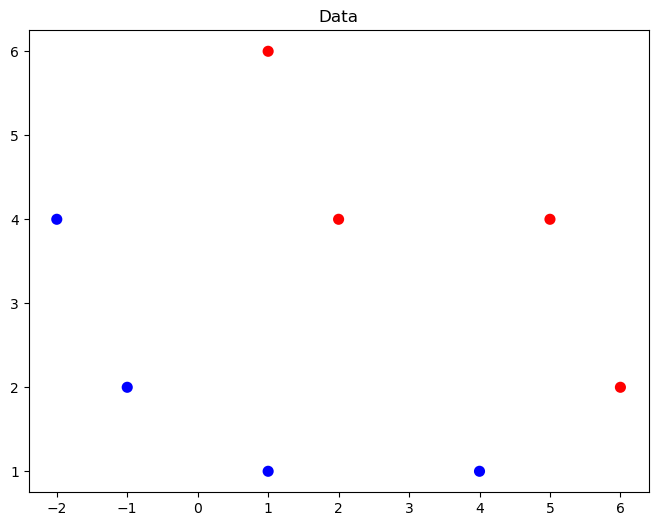

In [58]:
X = np.array([
    [1, -2, 4],
    [1, 4, 1],
    [1, -1, 2],
    [1, 1, 1],
    [1, 1, 6],
    [1, 2, 4],
    [1, 6, 2],
    [1, 5, 4]
])

y = np.array([-1,-1,-1,-1,1,1,1,1])


plt.figure(figsize=(8,6))
plt.title("Data")
plt.scatter(X[:,1], X[:,2], linewidths=2, 
            c=["red" if col==1 else "blue" for col in y])
plt.show()

In [59]:
# SVM on SGD

from tqdm.auto import tqdm
def svm_sgd(X, Y):
    w = np.random.normal(size=len(X[0]))
    lr = 0.1
    n_epochs = 100000
    C = 10000
    
    for epoch in tqdm(range(1, n_epochs + 1)): # 1 эпоха - проход по всем данным 
        for i, x in enumerate(X):                  # 1 итерация (в данном случае) - рассчет градиента для 1 точки
            
            # HingeLoss = max(0, y[i] x[i] w)
            HL = Y[i] * np.dot(X[i], w) # Hinge Loss - часть максимума, кторая больше 0

            if HL < 1:
                w = w - lr * (1/epoch) * (w - C * X[i] * Y[i])
            else:
                w = w - lr * (1/epoch) * w
    
    return w

w = svm_sgd(X, y)


  0%|          | 0/100000 [00:00<?, ?it/s]

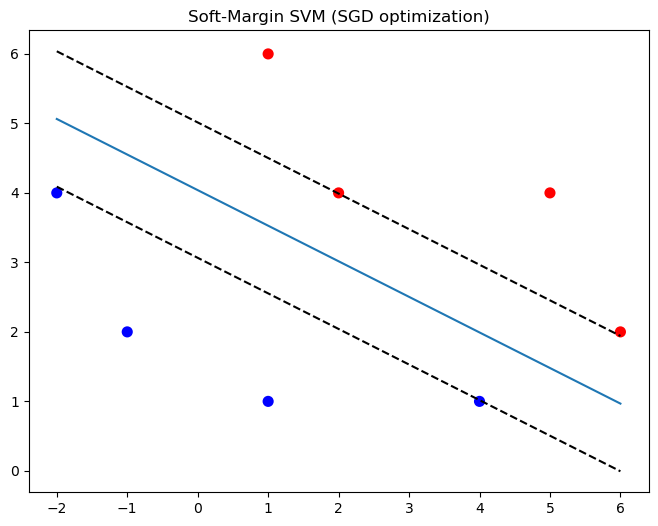

In [60]:
x_hyp = np.arange(-2,7)
y_hyp = -(x_hyp * w[1] + w[0]) / w[2]

left_margin_y = (-1 - x_hyp * w[1] - w[0]) / w[2]
right_margin_y = (1 - x_hyp * w[1] - w[0]) / w[2]

plt.figure(figsize=(8,6))
plt.title("Soft-Margin SVM (SGD optimization)")
plt.scatter(X[:,1], X[:,2], linewidths=2, 
            c=["red" if col==1 else "blue" for col in y])
plt.plot(x_hyp, y_hyp)
plt.plot(x_hyp, left_margin_y, color='black', linestyle="--")
plt.plot(x_hyp, right_margin_y, color='black', linestyle="--")
plt.show()

# Sklearn

In [32]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import svm

def plot_svc_log_decision_function(clf1, clf2, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    P2 = clf2.decision_function(XY)
    P2 = P2.reshape(XX.shape)
    cplot = ax.contour(XX, YY, P1, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    
    ax.contour(XX, YY, P2, colors='r',
               levels=[0], alpha=0.5,
               linestyles=['-'])

    
def plot_svc_decision_function(clf1, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    
    cplot = ax.contour(XX, YY, P1, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)

def lin_sep_svm_demo(class_sep=2, random_state=30):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=random_state)

    lin_svm = svm.SVC(kernel='linear', C=1).fit(X, y)
    
    log_reg = LogisticRegression(C=1).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    
    plot_svc_log_decision_function(lin_svm, log_reg)

    plt.scatter([plt.xlim()[0]], [plt.ylim()[0]], color='k', label='svm', marker='.')
    plt.scatter([plt.xlim()[0]], [plt.ylim()[0]], color='r', label='logred', marker='.')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()

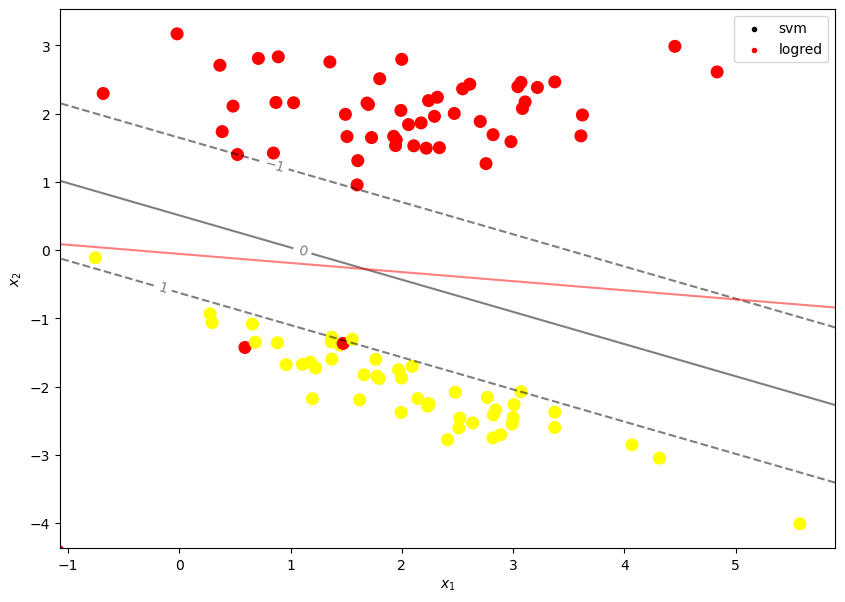

In [43]:
lin_sep_svm_demo(class_sep=2, random_state=3)

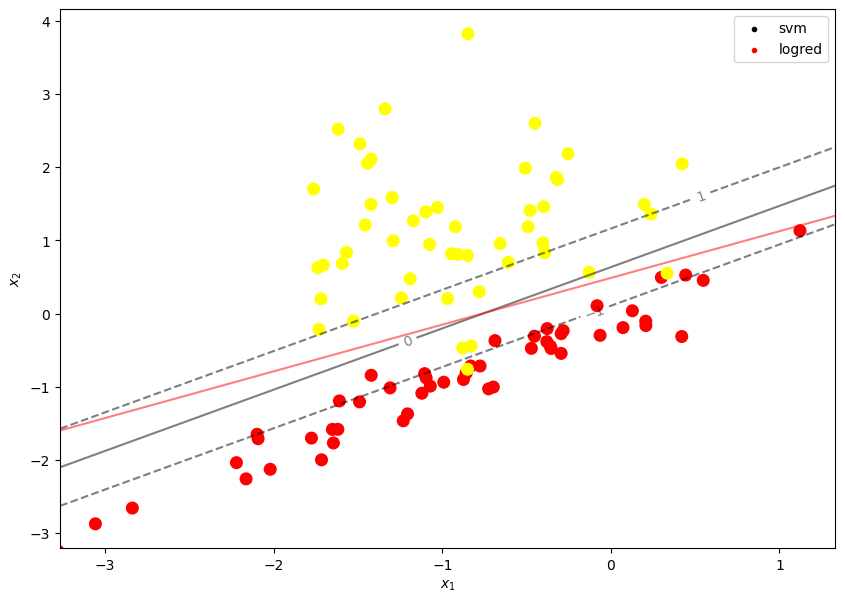

In [35]:
lin_sep_svm_demo(class_sep=1)

# Ядра (kernels) и спрямляющие пространства

Существуют такие функции K(x, y), что:

$$K(x, y) = \phi(x)^T \phi(y)$$

* $\phi: X \rightarrow H$
* $H$ - пространство большей размерности, в котором классы становятся линейноразделимыми, называется **спрямляющим**.
* Разделяющся гиперплоскость в таком пространстве будет линейной, но при проекции на исходное пространство $X$ - нет

Популярные ядра:

1. Линейное (linear): $$\langle x, y\rangle$$
2. Полиномиальное (polynomial): $$(\gamma \langle x, y\rangle + с)^d$$ 
3. Radial basis function kernel (rbf): $$e^{(-\gamma  \cdot \|x - y\|^2)}$$ 
4. Sigmoid: $$\tanh(\gamma \langle x,y \rangle + r)$$


Хорошую интерактивную визуализацию можно найти на [YouTube](https://www.youtube.com/watch?v=3liCbRZPrZA).


# Визуализации перехода в спрямляющая пространство

Пусть у нас есть точни на плоскости, причем они линейно нераздилимы и образуют два кластера: шар внутри кольца.

Передем из двумерного пространство в трехмерное, добавив координату по формуле по формуле: $z = x_1^2 + x_2^2$. 

В трехмерном пространстве данные уже можно разделить гиперплоскостью, которая при проекция на исходное 2D пространство даст в сечение окружность. Таким образом, мы получим нелинейную разделяющую границу, которая разделит классы.

In [61]:
from sklearn.datasets import make_circles

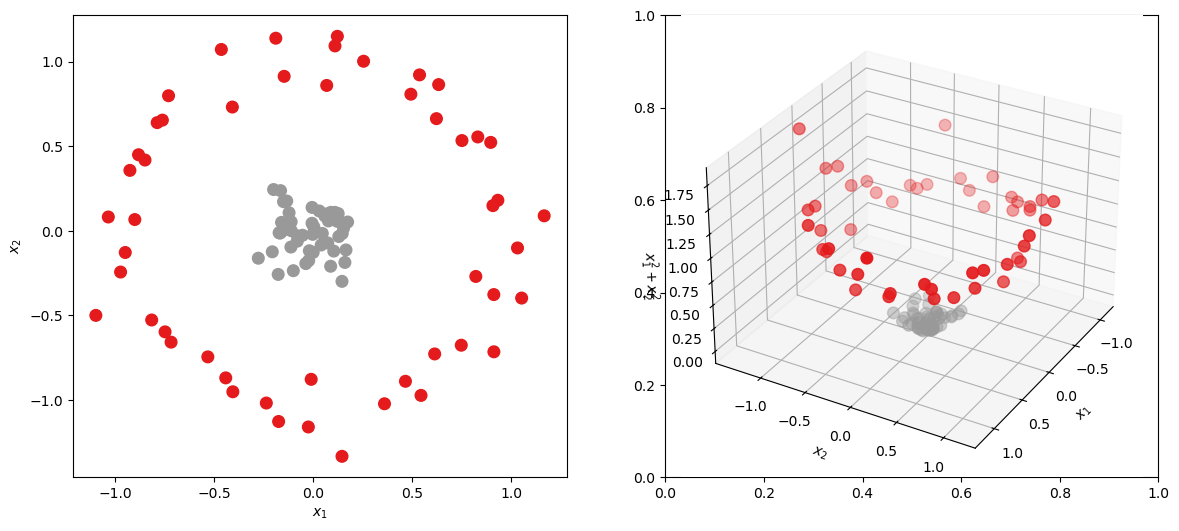

In [62]:
def demo_nonlin_data():
    X, y = make_circles(n_samples=100, factor=0.1, 
                        noise=0.1, random_state=0)

    fig = plt.figure(figsize=(14, 6))
    
    ax = fig.add_subplot(1, 2, 1)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='Set1')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    r = X[:, 0] ** 2 + X[:, 1] ** 2
    
    ax = fig.add_subplot(1, 2, 2)
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=70, cmap='Set1')
    ax.view_init(elev=30, azim=30)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_1^2 + x_2^2$')
    ax.set_facecolor("white")
    
    plt.show()

demo_nonlin_data()

Новая ось: $z = x_1^2 + x_2^2$

In [64]:
def lin_sep_svm_demo_kernel_C(class_sep=2, kernel='linear', random_state=31, 
                                C = 1, gamma=1.2, degree=2, coef0=0.0):
        X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)

        lin_svm = svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, coef0=0.0).fit(X, y)

        plt.figure(figsize=(10,7))
        plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
        plot_svc_decision_function(lin_svm)
        plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
                s=200, facecolors='none')
        
        
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')

Линейное (linear): 

$K(x, y) = \langle x, y\rangle$

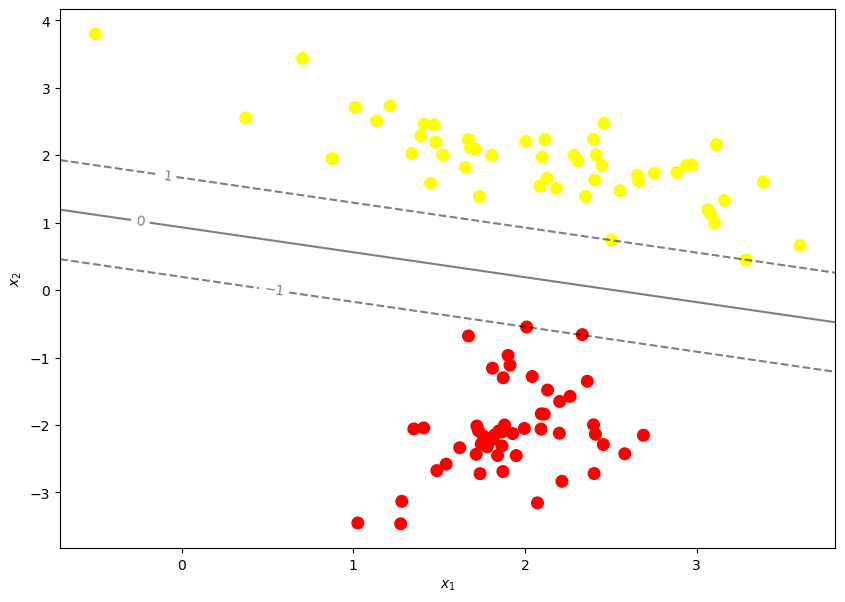

In [65]:
lin_sep_svm_demo_kernel_C(kernel = 'linear')

Полиномиальное (polynomial): 

$K(x, y) = (\gamma \langle x, y\rangle + с)^d$ 

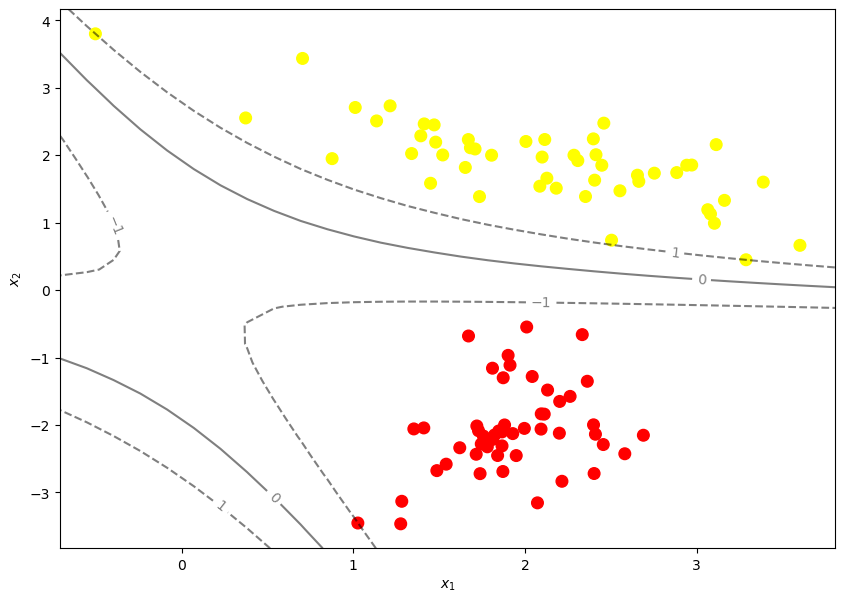

In [66]:
lin_sep_svm_demo_kernel_C(kernel='poly')

Radial basis function kernel (rbf): 

$K(x, y) = e^{(-\gamma  \cdot \|x - y\|^2)}$

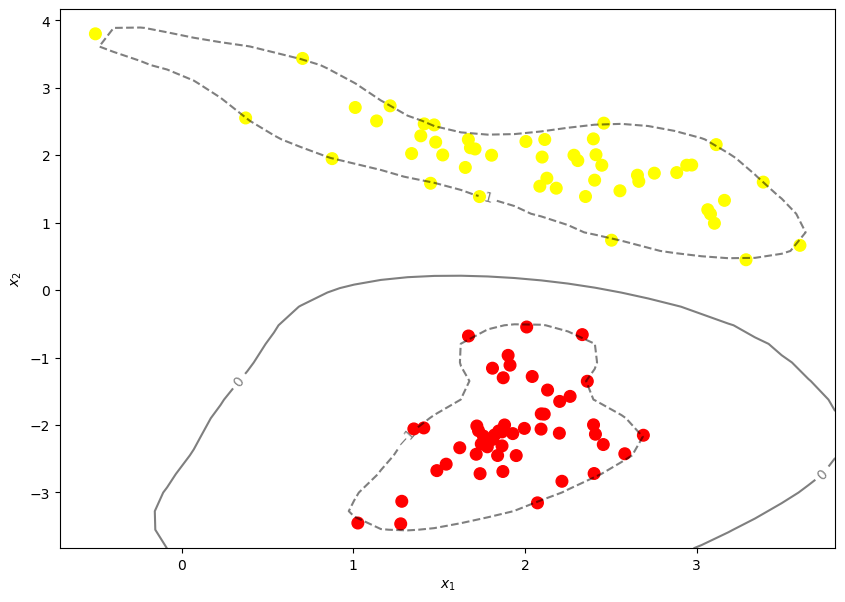

In [67]:
lin_sep_svm_demo_kernel_C(kernel='rbf')

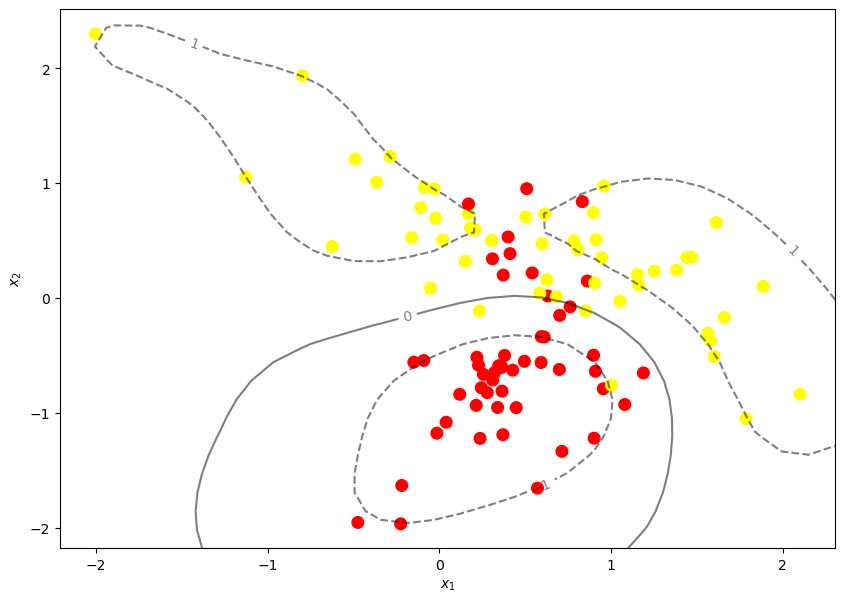

In [68]:
lin_sep_svm_demo_kernel_C(class_sep=0.5, kernel='rbf')

## Sklearn интерфейсы
* `sklearn.svm.SVC` - SVM с возможностью выбора kernel.
* `sklearn.svm.LinearSVC` - линейный SVM на основе liblinear. Работает быстрее.

# Практика

In [69]:
data = pd.read_table("heart.dat", sep=" ", header=None)
data.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", 
                "serum_cholestoral", "fasting_blood_sugar", "resting_ecg", 
                "max_heart_rate", "ex_angina", "oldpeak_ST", "slope_peak_ST", 
                "major_vessels", "thal", "target"]
data["target"] = data["target"] - 1

In [70]:
data.shape

(270, 14)

In [71]:
data["target"].value_counts()

0    150
1    120
Name: target, dtype: int64

In [72]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,ex_angina,oldpeak_ST,slope_peak_ST,major_vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     270 non-null    float64
 1   sex                     270 non-null    float64
 2   chest_pain_type         270 non-null    float64
 3   resting_blood_pressure  270 non-null    float64
 4   serum_cholestoral       270 non-null    float64
 5   fasting_blood_sugar     270 non-null    float64
 6   resting_ecg             270 non-null    float64
 7   max_heart_rate          270 non-null    float64
 8   ex_angina               270 non-null    float64
 9   oldpeak_ST              270 non-null    float64
 10  slope_peak_ST           270 non-null    float64
 11  major_vessels           270 non-null    float64
 12  thal                    270 non-null    float64
 13  target                  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.

In [74]:
import seaborn as sns

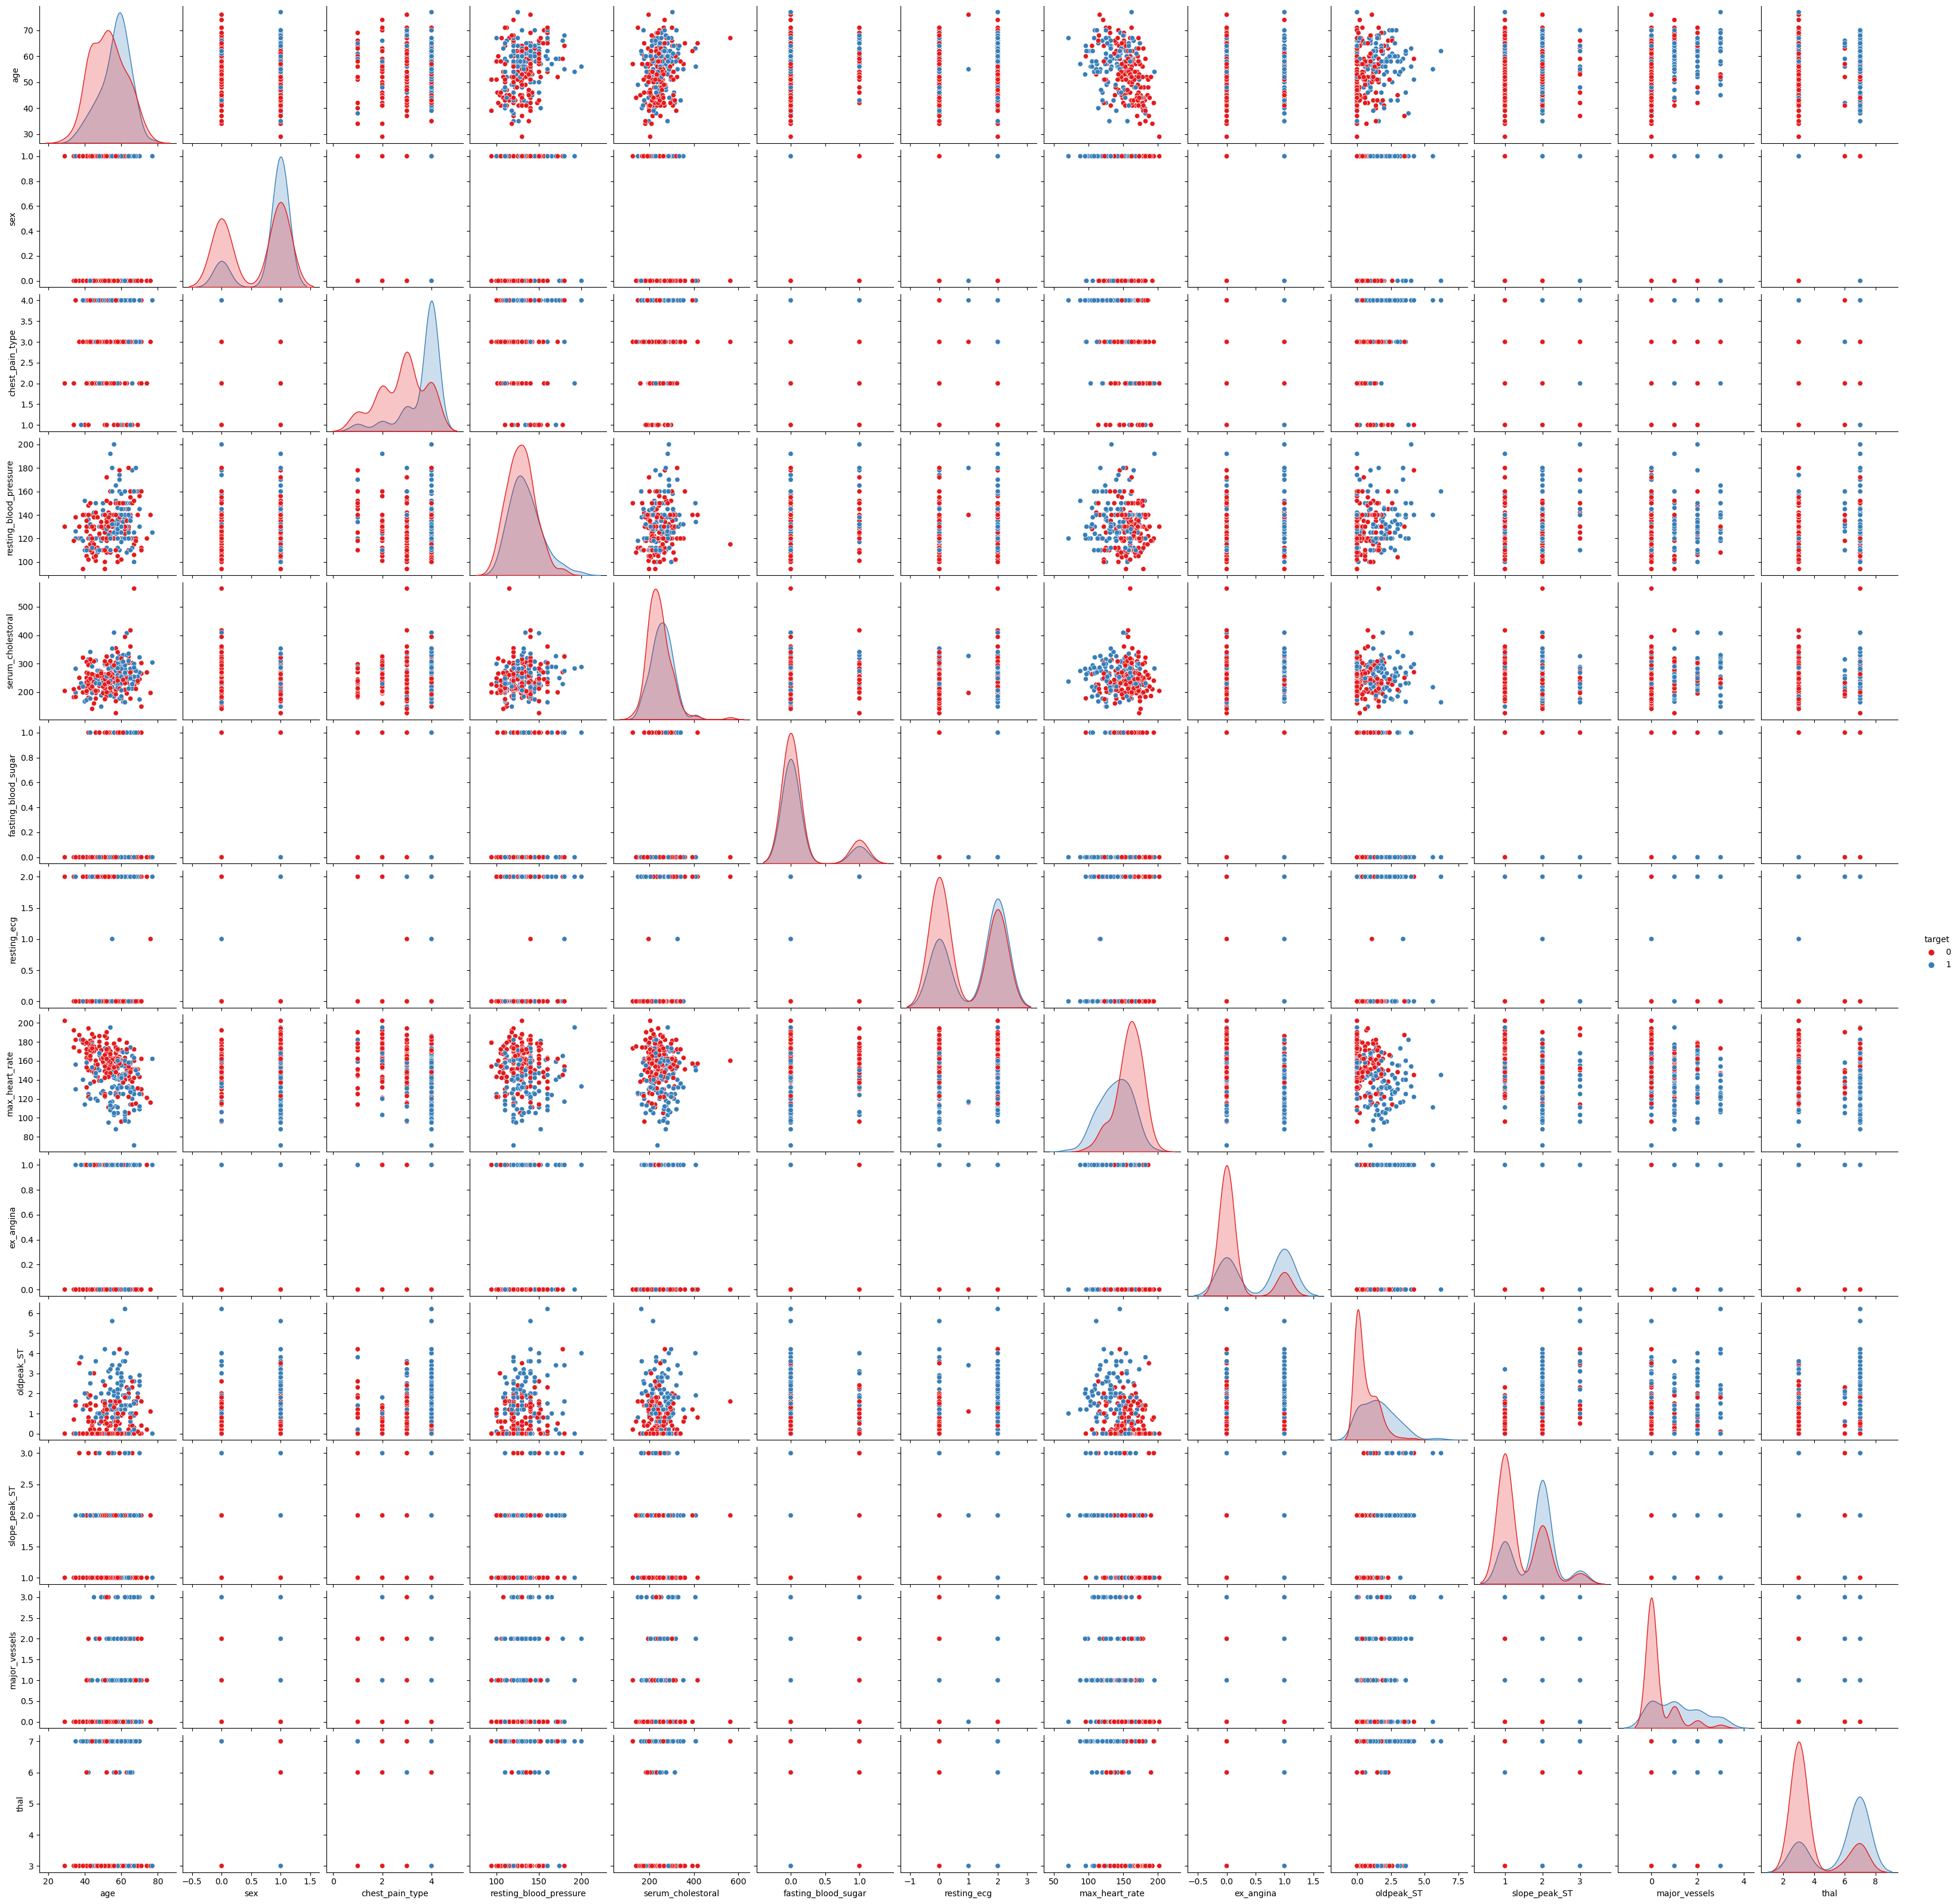

In [15]:
sns.pairplot(data=data,
            hue='target',
            palette='Set1')
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score, \
    accuracy_score, precision_score, recall_score, f1_score


In [76]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    stratify=data['target'],
    random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
model_LogR = LogisticRegression()
model_LogR.fit(X_train_scaled, y_train)
pred_LR = model_LogR.predict(X_test_scaled)

In [79]:
qr_lr = quality_report(pred_LR, y_test.values)


=== Quality Report ===
Accuracy: 	 0.827
Precision: 	 0.778
Recall: 	 0.824
f1_score: 	 0.800
ROC-AUC: 	 0.827



In [80]:
model_svc = svm.SVC()
model_svc.fit(X_train_scaled, y_train)
pred_svc = model_svc.predict(X_test_scaled)

In [81]:
qr_svc = quality_report(pred_svc, y_test.values)


=== Quality Report ===
Accuracy: 	 0.840
Precision: 	 0.778
Recall: 	 0.848
f1_score: 	 0.812
ROC-AUC: 	 0.841



In [82]:
from catboost import CatBoostClassifier 

In [83]:
clf = CatBoostClassifier(n_estimators=50, max_depth=3, logging_level="Silent")
clf.fit(X_train_scaled, y_train)
pred_catboost = clf.predict(X_test_scaled)

In [84]:
qr_svc = quality_report(pred_catboost, y_test.values)


=== Quality Report ===
Accuracy: 	 0.827
Precision: 	 0.722
Recall: 	 0.867
f1_score: 	 0.788
ROC-AUC: 	 0.835



# Ссылки и ресурсы

University of Waterloo:

* https://www.youtube.com/watch?v=SHBFk1ULNlE&list=PLehuLRPyt1HzXDemu7K4ETcF0Ld_B5adG&index=8
* https://www.youtube.com/watch?v=rLT4OFy-atc&list=PLehuLRPyt1HzXDemu7K4ETcF0Ld_B5adG&index=9
* https://www.youtube.com/watch?v=iZ3HF2_vF2c&list=PLehuLRPyt1HzXDemu7K4ETcF0Ld_B5adG&index=10

Stanford course - Mining Massive Datasets:

* https://www.youtube.com/watch?v=v7H5ks5iDEQ&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=67
* https://www.youtube.com/watch?v=ax8LxRZCORU&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=68
* https://www.youtube.com/watch?v=bS1avoD6g8s&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=69
* https://www.youtube.com/watch?v=8xbnLHn4jjQ&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=70
* https://www.youtube.com/watch?v=rB-iRIpAPKo&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=71

MIT OCW:

* https://www.youtube.com/watch?v=_PwhiWxHK8o
* https://www.youtube.com/watch?v=6nDqY8MPLDM

Articles:

* https://towardsdatascience.com/support-vector-machines-for-classification-fc7c1565e3
* https://medium.com/@saishruthi.tn/support-vector-machine-using-numpy-846f83f4183d
* https://pythonprogramming.net/support-vector-machine-intro-machine-learning-tutorial/
* https://houxianxu.github.io/2015/04/25/support-vector-machine/
* https://maviccprp.github.io/a-support-vector-machine-in-just-a-few-lines-of-python-code/
* https://delirium-00.livejournal.com/7649.html

Regression:

* https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html